# Exploratory Data Analysis
Demo from lecture 2 of [ORIE 4741](https://people.orie.cornell.edu/mru8/orie4741)

In [1]:
# Install packages
using Pkg
Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("Plots")
Pkg.add("StatsPlots")

   Updating registry at `~/.julia/registries/General`


   Updating git-repo `https://github.com/JuliaRegistries/General.git`


  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`
  Resolving package versions...
No Changes to `~/.julia/environments/v1.5/Project.toml`
No Changes to `~/.julia/environments/v1.5/Manifest.toml`


In [50]:
# bring packages into main namespace
using DataFrames             # Data tables are called "DataFrames"
using StatsPlots             # load plotting packages 
using Statistics             # basic statistical functions
using CSV                    # tools for working with CSV files
# plotly() # good interactive html plotting tool
pyplot()   # good plotting tool for saving pdf figures

Plots.PyPlotBackend()

# Load data

The data is available on the course website, and is about 200MB.

If you point your browser to the url below, it will be downloaded to your standard download folder. On Mac, you can access it at `/Users/yourusername/Downloads/acs_2013.csv`.

In [51]:
url = "https://people.orie.cornell.edu/mru8/orie4741/data/acs_2013.csv"

"https://people.orie.cornell.edu/mru8/orie4741/data/acs_2013.csv"

Or, if you've synced or cloned the whole demos GitHub repo, you can access the truncated version `acs_2013_trunc.csv` locally without doing anything. (Try the readtable command below to test it out.)

In [52]:
acs = CSV.read("acs_2013_trunc.csv", limit=10000) # read 10000 rows from the csv
head(acs)

,ACREHOUS,CLASSWKR,COMMUSE,COSTELEC,COSTGAS,COSTWATR,EDUC,EMPSTAT,FOODSTMP
,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Float64,Int64
1,0,0,0,0.0,0.0,0.0,7,3.0,1
2,1,2,1,4200.0,9993.0,480.0,8,1.0,1
3,1,1,1,4200.0,9993.0,480.0,6,1.0,1
4,1,0,1,4200.0,9993.0,480.0,7,3.0,1
5,1,0,1,4200.0,9993.0,480.0,7,3.0,1
6,1,2,1,3600.0,9993.0,700.0,10,1.0,1


# Summary statistics

In [53]:
size(acs)

(10000, 21)

In [54]:
income = acs[:HHINCOME];

In [55]:
median(income)

55000.0

In [56]:
mean(income)

568847.3694

**Poll**: Is mean income computed here plausible for US income distribution?
* A) No, this value is too high 
* B) Plausible
* C) No, this value is too low

In [57]:
std(income)

2.1760479511254504e6

In [58]:
maximum(income)

9.999999e6

In [59]:
# Plotting

In [60]:
"""compute summary statistics on observed values in data array"""
function summary_stats(arr)
    clean_arr = skipmissing(arr)
    print("missing: $(mean(ismissing.(arr)))%\n")
    print("maximum: $(maximum(clean_arr))\n")
    print("minimum: $(minimum(clean_arr))\n")
    print("median:  $(median(clean_arr))\n")
    print("mean:    $(mean(clean_arr))\n")
    print("std:     $(std(clean_arr))\n")
end

summary_stats

In [61]:
?summary_stats

search: summary_stats



compute summary statistics on observed values in data array


In [62]:
summary_stats(income)

missing: 0.0%
maximum: 9.999999e6
minimum: 0.0
median:  55000.0
mean:    568847.3694
std:     2.1760479511254486e6


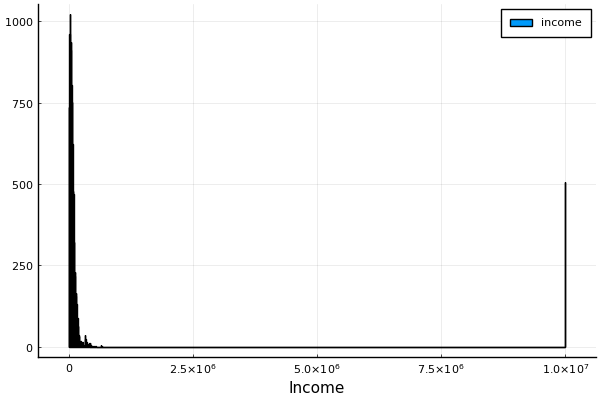

In [63]:
histogram(acs[:HHINCOME], label="income")
xlabel!("Income")

**Poll**: Is this plausible for US income distribution?
* A) No, not plausible
* B) Yes, plausible

In [82]:
rows_with_99percent_income = acs[:HHINCOME].<4e6
acs99 = acs[rows_with_99percent_income,:];

LoadError: ArgumentError: unable to check bounds for indices of type Missing

In [83]:
head(acs99)

,ACREHOUS,CLASSWKR,COMMUSE,COSTELEC,COSTGAS,COSTWATR,EDUC,EMPSTAT,FOODSTMP
,Int64,Int64,Int64,Float64,Float64,Float64,Int64,Float64,Int64
1,1,2,1,4200.0,9993.0,480.0,8,1.0,1
2,1,1,1,4200.0,9993.0,480.0,6,1.0,1
3,1,0,1,4200.0,9993.0,480.0,7,3.0,1
4,1,0,1,4200.0,9993.0,480.0,7,3.0,1
5,1,2,1,3600.0,9993.0,700.0,10,1.0,1
6,2,0,1,2640.0,240.0,360.0,5,3.0,2


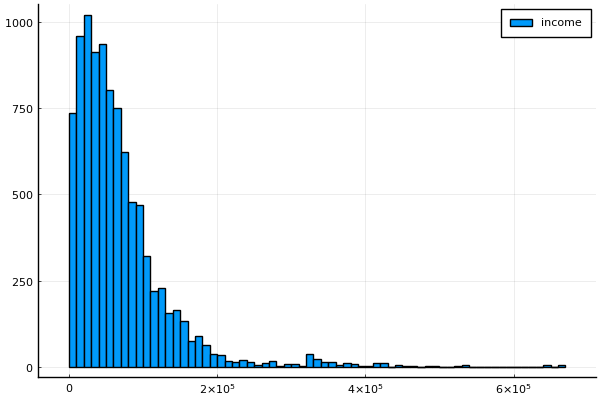

In [84]:
histogram(acs99[:HHINCOME], label="income")

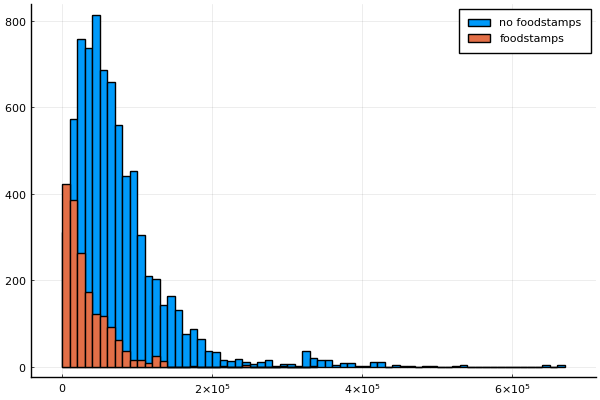

In [85]:
@df acs99 histogram(:HHINCOME, group=:FOODSTMP, label=["no foodstamps" "foodstamps"])

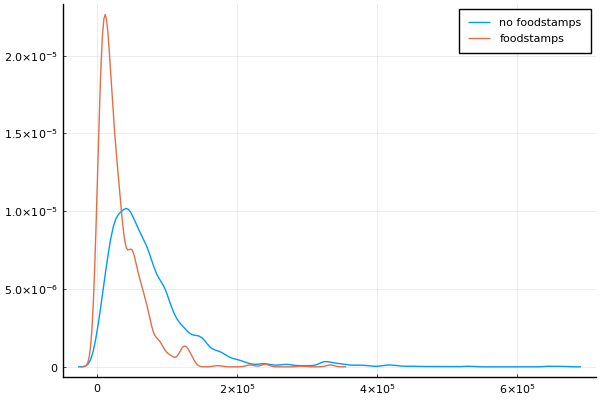

In [86]:
@df acs99 density(:HHINCOME, group=:FOODSTMP, label=["no foodstamps" "foodstamps"])

# Now with recoded data
The truncated version of the cleaned data set is in the demos repo as `acs_2013_cleaned_trunc.csv`.

In [87]:
acs = CSV.read("acs_2013_cleaned_trunc.csv"; limit=10000, missingstring="NA");

In [88]:
head(acs)

,ACREHOUS,CLASSWKR,COMMUSE,COSTELEC,COSTGAS,COSTWATR,EDUC,EMPSTAT,FOODSTMP
,Int64?,Int64?,Int64?,Float64?,Float64?,Float64?,Int64?,Float64?,Int64
1,missing,missing,missing,missing,missing,missing,7,3.0,1
2,1,2,1,4200.0,missing,480.0,8,1.0,1
3,1,1,1,4200.0,missing,480.0,6,1.0,1
4,1,missing,1,4200.0,missing,480.0,7,3.0,1
5,1,missing,1,4200.0,missing,480.0,7,3.0,1
6,1,2,1,3600.0,missing,700.0,10,1.0,1


In [96]:
?CSV.read

`CSV.read(source, sink::T; kwargs...)` => T

Read and parses a delimited file, materializing directly using the `sink` function.

`CSV.read` supports all the same keyword arguments as [`CSV.File`](@ref).


In [97]:
summary_stats(acs[:HHINCOME])

missing: 0.0606%
maximum: 664040.0
minimum: 1.0
median:  52000.0
mean:    67966.16978922716
std:     64930.350456016495


**Poll**: Is mean income computed here plausible for US income distribution?
* A) No, this value is too high 
* B) Plausible
* C) No, this value is too low

In [98]:
# this code produces an error: histogram doesn't know how to handle missing values 
@df acs histogram(:HHINCOME) 

LoadError: MethodError: no method matching AbstractFloat(::Type{Union{Missing, Float64}})
Closest candidates are:
  AbstractFloat(!Matched::Bool) at float.jl:258
  AbstractFloat(!Matched::Int8) at float.jl:259
  AbstractFloat(!Matched::Int16) at float.jl:260
  ...

In [99]:
"""drop all rows of a data frame with a missing entry in column named s"""
function dropmissing(df::DataFrame, s::Symbol)
    return df[.!ismissing.(df[:,s]),:]
end
function dropmissing(df::DataFrame, ss::Symbol...)
    keep_rows = fill(true, size(df,1))
    for s in ss
        keep_rows = keep_rows .& .!ismissing.(df[:,s])
    end
    return df[keep_rows,:]
end

dropmissing (generic function with 2 methods)

In [115]:
(acs[1:10,:])[.!ismissing.(acs[1:10, :COSTGAS]), :]

,ACREHOUS,CLASSWKR,COMMUSE,COSTELEC,COSTGAS,COSTWATR,EDUC,EMPSTAT,FOODSTMP
,Int64?,Int64?,Int64?,Float64?,Float64?,Float64?,Int64?,Float64?,Int64
1,2,missing,1,2640.0,240.0,360.0,5,3.0,2
2,2,2,1,2640.0,240.0,360.0,6,2.0,2
3,2,missing,1,2640.0,240.0,360.0,2,missing,2


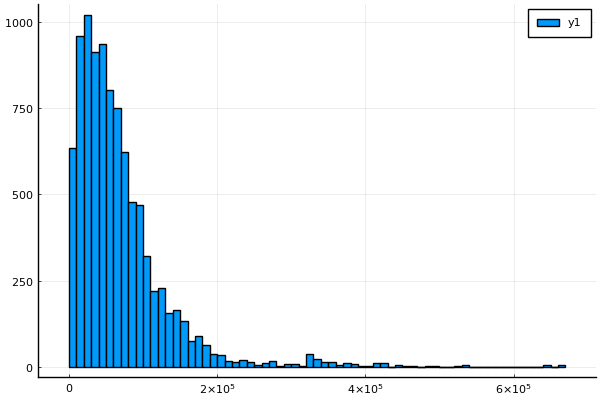

In [116]:
@df dropmissing(acs, :HHINCOME) histogram(:HHINCOME)

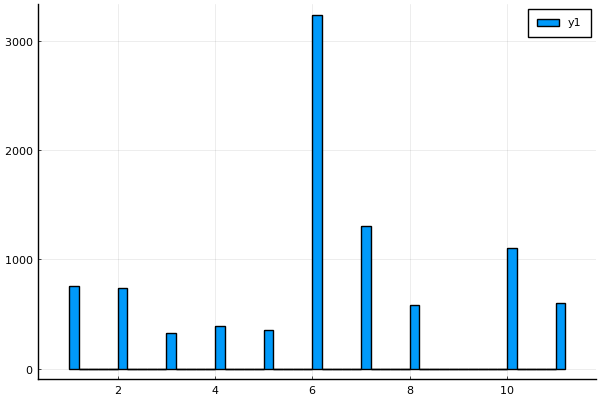

In [117]:
@df dropmissing(acs, :EDUC) histogram(:EDUC)

Look at income distribution by :FOODSTMP, :LABFORCE, :OWNERSHP, ...

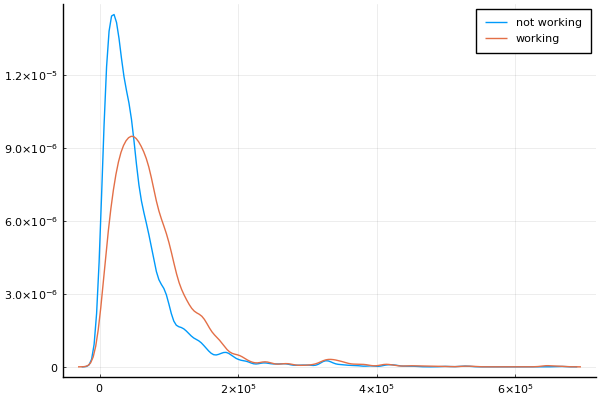

In [118]:
@df dropmissing(acs, :LABFORCE, :HHINCOME) density(:HHINCOME, group=:LABFORCE, label=["not working" "working"])

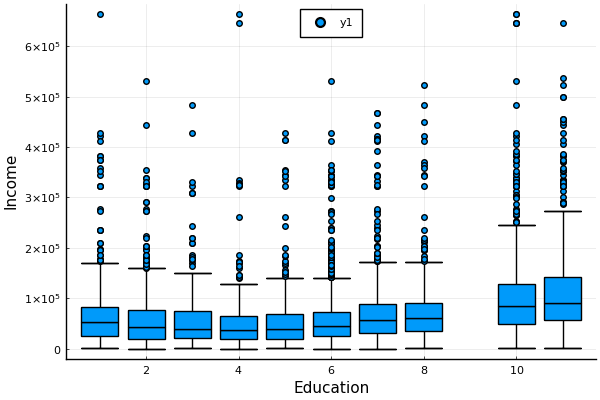

In [78]:
@df dropmissing(acs, :EDUC, :HHINCOME) boxplot(:EDUC, :HHINCOME)
xlabel!("Education")
ylabel!("Income")

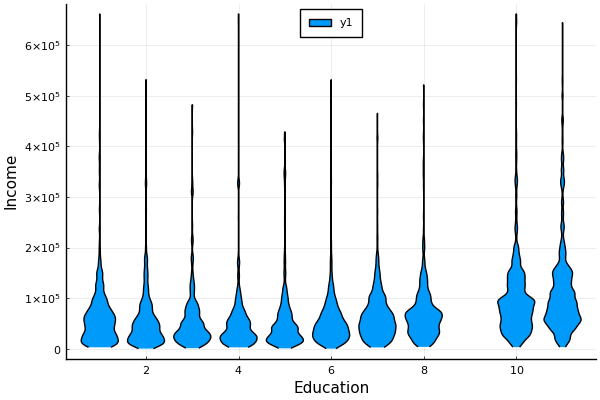

In [119]:
@df dropmissing(acs, :EDUC, :HHINCOME) violin(:EDUC, :HHINCOME)
xlabel!("Education")
ylabel!("Income")

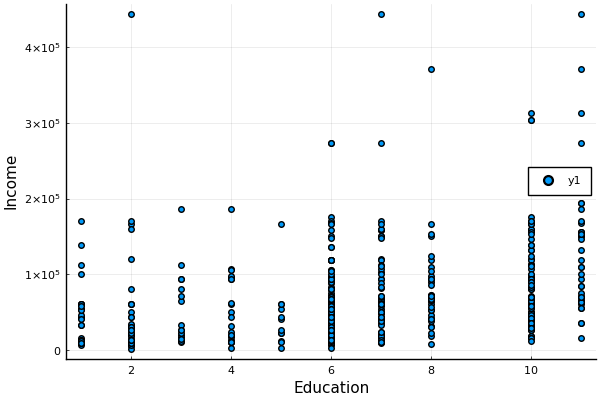

In [123]:
@df dropmissing(acs, :EDUC, :HHINCOME)[1:500,:] scatter(:EDUC, :HHINCOME)
xlabel!("Education")
ylabel!("Income")

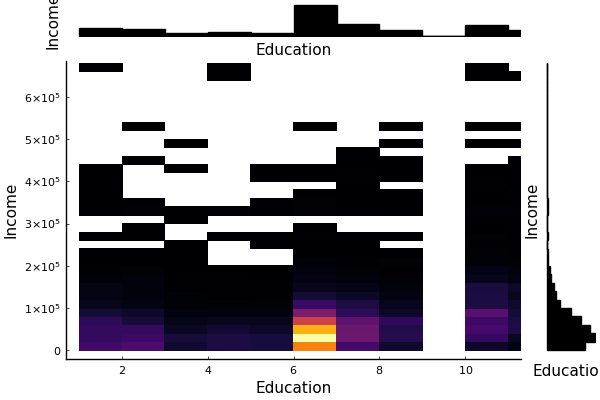

In [127]:
@df dropmissing(acs, :EDUC, :HHINCOME) marginalhist(:EDUC, :HHINCOME)
xlabel!("Education")
ylabel!("Income")

# More good plotting tools: 

* [Plots.jl](https://juliaplots.github.io) in Julia
* [StatsPlots.jl](https://github.com/JuliaPlots/StatsPlots.jl) in Julia
* [ggplot2](http://ggplot2.org/) in R
* [MatPlotLib](http://matplotlib.org/) in Python or Julia
* [D3](https://d3js.org/) in JavaScript